# Population & General Demographics in East Africa
***
<img src="https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3570&q=80" alt="crowded street" style="width:500px;">

<a id="WebScraping"><h2>Web Scraping</h2></a>
***
<a id="ScraperImport"><h3>Importing Libraries</h3></a>

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import warnings
warnings.filterwarnings('ignore')



<a id="Setup"><h3>Browser Setup</h3></a>

In [17]:
path="https://data.worldbank.org/"
folder=r"C:\Users\NAJIB\Documents\Data Analysis\EastAfrica\Data"
options=Options();
prefs={"download.default_directory":r"C:\Users\NAJIB\Documents\EastAfrica\Data"}
options.add_experimental_option("prefs",prefs);
driver = webdriver.Chrome(options=options)
driver.get(path)

<a id="downloading"><h3>Downloading Country Specific Data</h3></a>

In [3]:
countries=['Somalia','Kenya','Ethiopia','Sudan', 'South Sudan','Eritrea','Djibouti','Rwanda','Uganda',
           'Burundi','Tanzania','World']

In [2]:
indicators=['Sex ratio at birth (male births per female births)',
'Age dependency ratio (% of working-age population)',
'Age dependency ratio, old (% of working-age population)',
'Age dependency ratio, young (% of working-age population)',
'Population growth (annual %)',
'Population, total',
'Population, female',
'Population, female (% of total population)'
'Population, male',
'Population, male (% of total population)',
'Life expectancy at birth, female (years)',
'Life expectancy at birth, total (years)',
'Life expectancy at birth, male (years)',
'Fertility rate, total (births per woman)',
'Survival to age 65, female (% of cohort)',
'Survival to age 65, male (% of cohort)',
'Population ages 00-04, female (% of female population)',
'Population ages 00-04, male (% of male population)',
'Population ages 0-14, female',
'Population ages 0-14, female (% of female population)',
'Population ages 0-14, male',
'Population ages 0-14, male (% of male population)',
'Population ages 0-14, total',
'Population ages 0-14 (% of total population)',
'Population ages 05-09, female (% of female population)',
'Population ages 05-09, male (% of male population)',
'Population ages 10-14, female (% of female population)',
'Population ages 10-14, male (% of male population)',
'Population ages 15-19, female (% of female population)',
'Population ages 15-19, male (% of male population)',
'Population ages 15-64, female',
'Population ages 15-64, female (% of female population)',
'Population ages 15-64, male',
'Population ages 15-64, male (% of male population)',
'Population ages 15-64, total',
'Population ages 15-64 (% of total population)',
'Population ages 20-24, female (% of female population)',
'Population ages 20-24, male (% of male population)',
'Population ages 25-29, female (% of female population)',
'Population ages 25-29, male (% of male population)',
'Population ages 30-34, female (% of female population)',
'Population ages 30-34, male (% of male population)',
'Population ages 35-39, female (% of female population)',
'Population ages 35-39, male (% of male population)',
'Population ages 40-44, female (% of female population)',
'Population ages 40-44, male (% of male population)',
'Population ages 45-49, female (% of female population)',
'Population ages 45-49, male (% of male population)',
'Population ages 50-54, female (% of female population)',
'Population ages 50-54, male (% of male population)',
'Population ages 55-59, female (% of female population)',
'Population ages 55-59, male (% of male population)',
'Population ages 60-64, female (% of female population)',
'Population ages 60-64, male (% of male population)',
'Population ages 65-69, female (% of female population)',
'Population ages 65-69, male (% of male population)',
'Population ages 65 and above, female',
'Population ages 65 and above, female (% of female population)',
'Population ages 65 and above, male',
'Population ages 65 and above, male (% of male population)',
'Population ages 65 and above, total',
'Population ages 65 and above (% of total population)',
'Population ages 70-74, female (% of female population)',
'Population ages 70-74, male (% of male population)',
'Population ages 75-79, female (% of female population)',
'Population ages 75-79, male (% of male population)',
'Population ages 80 and above, female (% of female population)',
'Population ages 80 and above, male (% of male population)',
]
indicator_codes=['SP.POP.BRTH.MF',
                 'SP.POP.DPND',
                 'SP.POP.DPND.OL',
                 'SP.POP.DPND.YG',
                 'SP.DYN.TFRT.IN',
                 'SP.DYN.LE00.FE.IN',
                 'SP.DYN.LE00.MA.IN',
                 'SP.DYN.LE00.IN',
                 'SP.POP.GROW',
                 'SP.POP.TOTL.FE.IN',
                 'SP.POP.TOTL.MA.IN',
                 'SP.POP.TOTL.MA.ZS',
                 'SP.POP.TOTL.FE.ZS',
                 'SP.DYN.TO65.FE.ZS',
                 'SP.DYN.TO65.MA.ZS']

In [3]:
for code in indicator_codes:
    driver.get(f'https://data.worldbank.org/indicator/{code}')
    country_indicator_download=driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[3]/article/aside/div/div[2]/div/p/a[3]').click()
    home_btn=driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/header/div/a[2]').click()
    time.sleep(2)

NameError: name 'driver' is not defined

In [68]:
import os
final_df = pd.DataFrame(columns=['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value'])
files=list(os.listdir('./Data/'))
for file,indicator in zip(files,indicators):
    file=f'./Data/{file}'
    temp_df=pd.read_excel(file,sheet_name='Data',skiprows=3)
    temp_df=temp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                 var_name='Year',
                 value_name='Value')
    temp_df['Country ISO3'] = temp_df['Country Code'].str[-3:]
    temp_df = temp_df[['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value']]
    temp_df=temp_df.loc[temp_df['Country Name'].isin(countries)]
    final_df=pd.concat([final_df,temp_df],ignore_index=True)
    # print(temp_df)
    # final_df = final_df.append(temp_df, ignore_index=True)
print(final_df)

      Country Name Country ISO3  Year  \
0          Burundi          BDI  1960   
1         Djibouti          DJI  1960   
2          Eritrea          ERI  1960   
3         Ethiopia          ETH  1960   
4            Kenya          KEN  1960   
...            ...          ...   ...   
11335      Somalia          SOM  2022   
11336  South Sudan          SSD  2022   
11337     Tanzania          TZA  2022   
11338       Uganda          UGA  2022   
11339        World          WLD  2022   

                                 Indicator Name     Indicator Code      Value  
0      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  44.451000  
1      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  45.281000  
2      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  39.649000  
3      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  42.676000  
4      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  50.263000  
...                        

<a id="ColumnExtraction"><h3>Extracting Specific Columns</h3></a>

In [70]:
final_df.to_csv('east_africa_pops_data.csv', index=False, header=True)
final_df.tail(5)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
11335,Somalia,SOM,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.134601
11336,South Sudan,SSD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.523108
11337,Tanzania,TZA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.422968
11338,Uganda,UGA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.527064
11339,World,WLD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.264885


<a id="EDA"><h2>Exploratory Data Analysis</h2></a>
***
<a id="structure"><h3>Checking Data Structure</h3></a>

In [3]:
df=pd.read_csv('east_africa_pops_data.csv')
df.rename(columns={'Country Name':'Country'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11340 entries, 0 to 11339
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         11340 non-null  object 
 1   Country ISO3    11340 non-null  object 
 2   Year            11340 non-null  int64  
 3   Indicator Name  11340 non-null  object 
 4   Indicator Code  11340 non-null  object 
 5   Value           11244 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 531.7+ KB


In [4]:
print(df.shape)
df.tail(3)

(11340, 6)


,Country,Country ISO3,Year,Indicator Name,Indicator Code,Value
11337,Tanzania,TZA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.422968
11338,Uganda,UGA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.527064
11339,World,WLD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.264885


In [4]:
# visualization
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

Text(0.5, 1.0, 'Distribution of Missing Values')

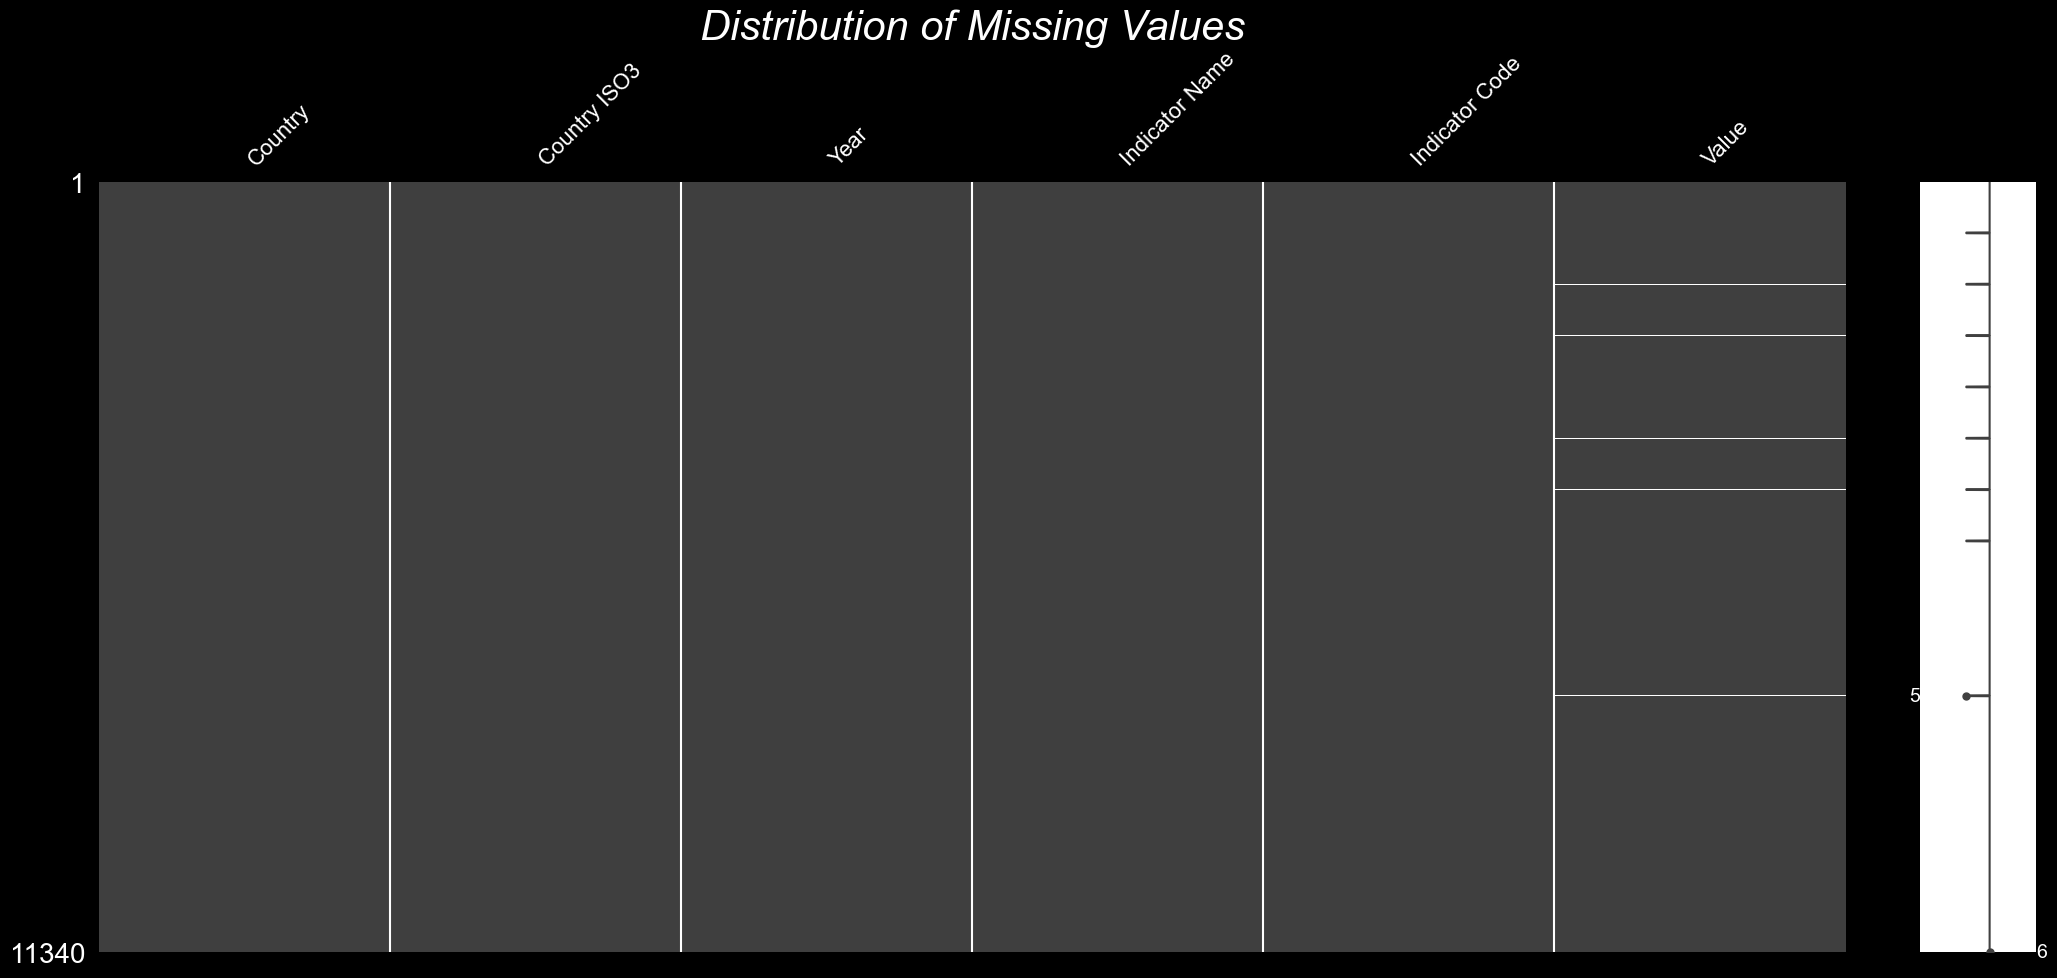

In [5]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

<a id="indicatorspecific"><h3>Creating Indicator specific data frame</h3></a>

In [21]:
def create_separate_frames(indicator):
    temp_df=df.loc[df['Indicator Name']==indicator]
    temp_df=temp_df.filter([f'Country','Year','{indicator}','Value'],axis=1)
#     print(temp_df)
    return temp_df

In [6]:
df=df.filter([f'Country','Year', 'Indicator Name','Value'])
df=df.pivot_table(index=['Country','Year'],columns='Indicator Name', values='Value').reset_index().rename_axis(None, axis=1)
df

,Country,Year,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)",Sex ratio at birth (male births per female births),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,Burundi,1960,92.290470,6.110580,86.179890,7.003000,44.451000,41.533000,43.024000,NaN,1.419148e+06,51.668737,1.327479e+06,48.331227,1.025000,37.848041,32.248556
1,Burundi,1961,92.420498,6.128134,86.292363,7.023000,44.631000,41.804000,43.252000,2.493352,1.453599e+06,51.619796,1.362374e+06,48.380240,1.025000,38.062682,32.557873
2,Burundi,1962,92.665829,6.159252,86.506577,7.038000,44.713000,42.102000,43.441000,2.504826,1.489006e+06,51.569129,1.398392e+06,48.430871,1.025000,38.045239,32.959218
3,Burundi,1963,93.544139,6.225037,87.319102,7.067000,45.009000,42.358000,43.718000,2.081634,1.519025e+06,51.524982,1.429107e+06,48.474984,1.025000,38.428793,33.257476
4,Burundi,1964,93.604189,6.254113,87.350076,7.090000,45.338000,42.543000,43.974000,2.845300,1.561243e+06,51.471456,1.471978e+06,48.528544,1.025000,38.879601,33.415269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,World,2018,55.235506,13.801911,40.121543,2.397340,75.272091,70.432414,72.784090,1.102580,3.806732e+09,49.684718,3.855045e+09,50.315282,1.063470,81.706657,73.068320
752,World,2019,55.322257,14.168339,39.892567,2.360559,75.470008,70.623612,72.979716,1.055964,3.847484e+09,49.691878,3.895198e+09,50.308122,1.062069,81.939131,73.344609
753,World,2020,55.354568,14.527944,39.612737,2.299626,74.857303,69.799705,72.243822,1.011039,3.887425e+09,49.705196,3.933538e+09,50.294804,1.059484,80.771268,71.669319
754,World,2021,55.289710,14.820548,39.291893,2.273191,73.947975,68.886412,71.327391,0.859197,3.922150e+09,49.721975,3.966012e+09,50.278025,1.057931,79.029690,69.533117


In [7]:
# Separate 'World' data and calculate mean for East African Countries
world_data = df[df['Country'] == 'World'].round(2)
east_africa_countries_data = df[df['Country'] != 'World']
world_data.columns = [f"{col} (World)" if col != 'Year' else col for col in world_data.columns]
east_africa_countries_data
# print(world_data['Age dependency ratio (% of working-age population) (World)'])

,Country,Year,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)",Sex ratio at birth (male births per female births),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,Burundi,1960,92.290470,6.110580,86.179890,7.003,44.451,41.533,43.024,NaN,1419148.0,51.668737,1327479.0,48.331227,1.025,37.848041,32.248556
1,Burundi,1961,92.420498,6.128134,86.292363,7.023,44.631,41.804,43.252,2.493352,1453599.0,51.619796,1362374.0,48.380240,1.025,38.062682,32.557873
2,Burundi,1962,92.665829,6.159252,86.506577,7.038,44.713,42.102,43.441,2.504826,1489006.0,51.569129,1398392.0,48.430871,1.025,38.045239,32.959218
3,Burundi,1963,93.544139,6.225037,87.319102,7.067,45.009,42.358,43.718,2.081634,1519025.0,51.524982,1429107.0,48.474984,1.025,38.428793,33.257476
4,Burundi,1964,93.604189,6.254113,87.350076,7.090,45.338,42.543,43.974,2.845300,1561243.0,51.471456,1471978.0,48.528544,1.025,38.879601,33.415269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Uganda,2018,93.732922,3.143031,90.589892,4.932,64.744,60.587,62.714,3.401278,20994287.0,50.569884,20521108.0,49.430116,1.028,63.811933,52.951116
689,Uganda,2019,91.740204,3.154826,88.585378,4.809,64.990,60.893,62.991,3.395091,21707475.0,50.542352,21241606.0,49.457651,1.028,64.337804,53.395080
690,Uganda,2020,89.879150,3.161138,86.718012,4.693,64.898,60.715,62.851,3.332809,22431520.0,50.516195,21973090.0,49.483802,1.028,64.012673,52.683745
691,Uganda,2021,88.213348,3.156663,85.056685,4.585,64.920,60.423,62.705,3.211428,23153140.0,50.493418,22700638.0,49.506582,1.029,63.996120,51.663767


In [8]:
fig=px.line(df,
            x='Year',
            y='Fertility rate, total (births per woman)',
            color='Country',
            title='Fertility Rate in East Africa',
            template='simple_white')
fig.show()

In [10]:
fig=px.line(df,
            x='Year',
            y='Life expectancy at birth, total (years)',
            color='Country',
            title='Life Expectancy',
            template='simple_white')
fig.show()

In [11]:
fig=px.line(df,
            x='Year',
            y='Population growth (annual %)',
            color='Country',
            title='Population Growth',
            template='simple_white')
fig.show()

In [22]:
import numpy as np
import chart_studio.plotly as py
import chart_studio
chart_studio.tools.set_credentials_file(username='najibhassan', api_key='6cgqVqcsbdzthPIb7UY0')
# Extract the required columns
columns = ['Year','Population, female (% of total population)', 'Population, male (% of total population)']
df_selected = east_africa_countries_data[columns]
# Group the data by year and calculate the mean values
df_grouped = df_selected.groupby('Year').mean().round(2).reset_index()

# Extract Required Columns from Grouped Data
men_bins=np.array(list(df_grouped['Population, male (% of total population)']))
women_bins=np.array(list(df_grouped['Population, female (% of total population)']))
women_bins
years=list[df_grouped['Year']]
y = list(range(0, 100, 2))
layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[0, 100],
                       tickvals=[0, 10, 20, 30, 40, 50, 60],
                       ticktext=[60, 70, 80, 90, 100, 0, 10],
                       title='Number'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

py.iplot(dict(data=data, layout=layout), filename='pyramid')